In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread
import scipy
from skimage.transform import resize
from PIL import Image
from scipy import ndimage
from dnn_app_utils import *
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


In [2]:
x, y = load_data()

C:\Users\ferna\Documents\Insper\IC\measuringMacroNutrients\first_iteration\dnn_app_utils.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  pizza_imgs = np.array(data) #cria uma matriz com todos os train_examples
C:\Users\ferna\Documents\Insper\IC\measuringMacroNutrients\first_iteration\dnn_app_utils.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  non_pizza = np.array(non_data)


In [3]:
train_x, test_x, train_y, test_y =  train_test_split(x, y, test_size=0.33, random_state=84)

In [4]:
train_x_orig = np.array(train_x)
test_x_orig = np.array(test_x)
train_y = np.array([train_y])
test_y = np.array([test_y])

In [5]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 1003
Number of testing examples: 495
Each image is of size: (64, 64, 3)
train_x_orig shape: (1003, 64, 64, 3)
train_y shape: (1, 1003)
test_x_orig shape: (495, 64, 64, 3)
test_y shape: (1, 495)


In [6]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten
test_x = test_x_flatten

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 1003)
test_x's shape: (12288, 495)


In [7]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.grid(True)
    plt.show()
    
    return parameters

In [8]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

Cost after iteration 0: 0.649757
Cost after iteration 100: 0.535479
Cost after iteration 200: 0.509434
Cost after iteration 300: 0.499218
Cost after iteration 400: 0.482571
Cost after iteration 500: 0.472734
Cost after iteration 600: 0.442544
Cost after iteration 700: 0.467170
Cost after iteration 800: 0.412490
Cost after iteration 900: 0.416331
Cost after iteration 1000: 0.397980
Cost after iteration 1100: 0.381890
Cost after iteration 1200: 0.363074
Cost after iteration 1300: 0.347588
Cost after iteration 1400: 0.327004
Cost after iteration 1500: 0.282421
Cost after iteration 1600: 0.299213
Cost after iteration 1700: 0.251631
Cost after iteration 1800: 0.251158
Cost after iteration 1900: 0.230969
Cost after iteration 2000: 0.284568
Cost after iteration 2100: 0.252809
Cost after iteration 2200: 0.179007
Cost after iteration 2300: 0.250823
Cost after iteration 2400: 0.176257
Cost after iteration 2500: 0.143596
Cost after iteration 2600: 0.133830
Cost after iteration 2700: 0.120256
Cost

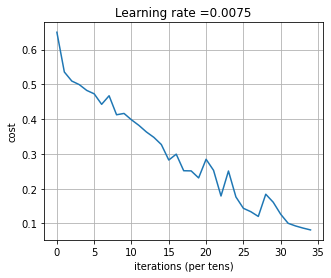

In [9]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 3500, print_cost = True)

In [10]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9940179461615151
y = 1.0, your L-layer model predicts a "pizza" picture.


In [11]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.7494949494949492
y = 0.0, your L-layer model predicts a "non-pizza" picture.


In [12]:
analysis = false_and_positives_analysis(pred_test, test_y)

The number of FALSE POSITIVES were:  67
The number of FALSE NEGATIVES were:  57
The number of TRUE POSITIVES were:  258
The number of TRUE NEGATIVES were:  113


In [15]:
my_image_loads = "pizza_img.jpg" # change this to the name of your image file 
my_label_y = [0] # the true class of your image (1 -> pizza, 0 -> non-pizza)

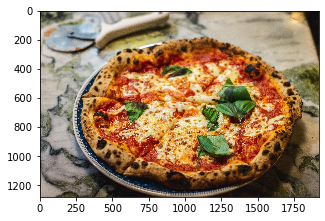

In [16]:
img = mpimg.imread(my_image_loads)
plt.imshow(img)
plt.show()

Accuracy: 0.0
y = 1.0, your L-layer model predicts a "pizza" picture.


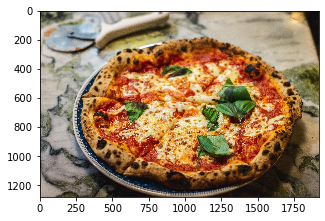

In [17]:
fname = my_image_loads
image = np.array(imread(fname))
my_image = resize(image, (num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
plt.show()